## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

C:\Users\a0970\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [10]:
from keras.layers import Dropout
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            #First Input Layer
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [11]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.1,0.25,0.5]

In [12]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for drop_rate in Dropout_EXP:
    keras.backend.clear_session()
    print("Experiment with Droprate = %.6f" % (drop_rate))
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=drop_rate)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer='adam')

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    exp_name_tag = "droprate-%s" % str(drop_rate)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Droprate = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)

Epoch 49/50
50000/50000 [==============================] - 12s 246us/step - loss: 1.1335 - acc: 0.5888 - val_loss: 1.3456 - val_acc: 0.5252
Epoch 50/50
50000/50000 [==============================] - 12s 241us/step - loss: 1.1308 - acc: 0.5919 - val_loss: 1.3414 - val_acc: 0.5321
Experiment with Droprate = 0.250000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)     

Epoch 47/50
50000/50000 [==============================] - 14s 285us/step - loss: 1.5140 - acc: 0.4557 - val_loss: 1.4950 - val_acc: 0.4752
Epoch 48/50
50000/50000 [==============================] - 12s 239us/step - loss: 1.5156 - acc: 0.4556 - val_loss: 1.4800 - val_acc: 0.4767
Epoch 49/50
50000/50000 [==============================] - 12s 238us/step - loss: 1.5121 - acc: 0.4566 - val_loss: 1.5058 - val_acc: 0.4676
Epoch 50/50
50000/50000 [==============================] - 13s 260us/step - loss: 1.5177 - acc: 0.4559 - val_loss: 1.4754 - val_acc: 0.4806
Experiment with Droprate = 0.500000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_

Epoch 45/50
50000/50000 [==============================] - 14s 285us/step - loss: 1.9230 - acc: 0.2700 - val_loss: 1.9714 - val_acc: 0.2805
Epoch 46/50
50000/50000 [==============================] - 13s 259us/step - loss: 1.9298 - acc: 0.2674 - val_loss: 1.9557 - val_acc: 0.2927
Epoch 47/50
50000/50000 [==============================] - 13s 267us/step - loss: 1.9176 - acc: 0.2774 - val_loss: 1.9454 - val_acc: 0.2933
Epoch 48/50
50000/50000 [==============================] - 13s 264us/step - loss: 1.9207 - acc: 0.2741 - val_loss: 1.9576 - val_acc: 0.2985
Epoch 49/50
50000/50000 [==============================] - 12s 243us/step - loss: 1.9184 - acc: 0.2732 - val_loss: 1.9458 - val_acc: 0.2866
Epoch 50/50
50000/50000 [==============================] - 12s 243us/step - loss: 1.9121 - acc: 0.2764 - val_loss: 1.9551 - val_acc: 0.2975


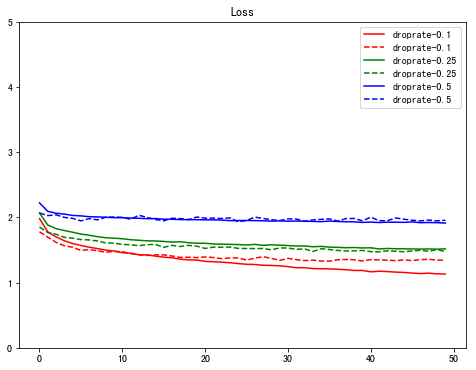

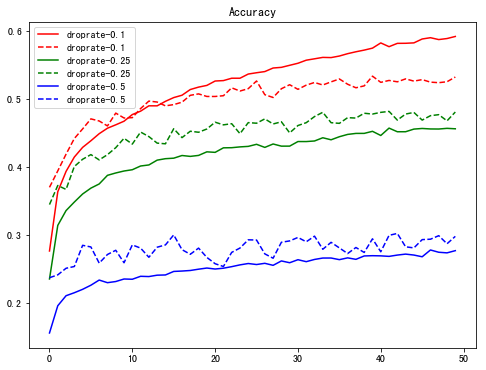

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()